# Preliminary analysis

This notebook was a starting point for exploring the sentence-level annotations compiled by the NLP team. Much of the code is now redundant, as the BERTje embedding pipeline was updated to have only a single pickle file with all the BERTje containers, which were also updated to include relevant information in the attributes of the [Container class](https://github.com/cltl/a-proof/blob/master/machine_learning/class_definitions.py). 

In [2]:
import pickle
from pathlib import Path

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
import statsmodels
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

In [3]:
# Make graphics nice
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set sensible defaults
sns.set()
sns.set_style("ticks")
sns.set_context('paper')

In [4]:
import class_definitions
from class_definitions import Annotation, BertContainer

In [5]:
DATADIR = '//home/piek/Documents/Non_covid_data_15oct/traindata_batch1'

In [6]:
DEMODIR = "//home/piek/Documents/Non_covid_data_15oct/traindata_batch1/Container_notities_2017_deel2_cleaned.csv---3115853__vervaart.pkl"

def preview_info_from_pkl(fpath):
    """Previews the contents of a single pickled BERTje container."""
    with open(fpath, 'rb') as file:
        all_containers = pickle.load(file)
        for container in all_containers:
            print(container.annotator, container.sen_id, container.sen, len(container.encoding), container.annot)
            
def extract_info_from_pkl(fpath):
    """Extracts all the key details of a pickled BERTje container."""
    with open(fpath, 'rb') as file:
        all_containers = pickle.load(file)
        contents = {'src_file': [], 'annotator': [], 'sentence_id': [], 
                    'sentence': [], 'encoding_shape': [], 'num_annot': [], 'annotations': [],}
            
        for container in all_containers:
            
            contents['src_file'].append(container.key)
            contents['annotator'].append(container.annotator)
            contents['sentence_id'].append(container.sen_id)
            contents['sentence'].append(container.sen)
        
            contents['encoding_shape'].append(torch.stack(container.encoding).shape if len(container.encoding) > 0 else None)
            if container.annot != []:
                contents['annotations'].append(' | '.join([c.label for c in container.annot]))
                contents['num_annot'].append(len(container.annot))
            else:
                contents['annotations'].append(None)
                contents['num_annot'].append(0)
            
        return contents

In [8]:
num_files = len(list(Path(DATADIR).glob("*.pkl")))
num_files

3192

In [9]:
dfs = []

# Loop through all the pickle files in a directory, extract BERTje information.
for file in tqdm(list(Path(DATADIR).glob("*.pkl"))):
    dfs.append(pd.DataFrame(extract_info_from_pkl(file)))

# Concatenate all the BERTje container information into a single pandas DataFrame.
df = pd.concat(dfs)
print(df.shape)

# Save the dataframe to CSV
df.to_csv('traindata_batch1.tsv', index=False, sep='\t')

100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


(802, 7)

In [9]:
# Check that reading the CSV file back in works
df = pd.read_csv('traindata_batch1.tsv', sep='\t')
print(df.shape)

(216959, 7)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216959 entries, 0 to 216958
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   src_id          216959 non-null  int64  
 1   annotator       216959 non-null  object 
 2   sentence_id     213767 non-null  float64
 3   sentence        216958 non-null  object 
 4   encoding_shape  216959 non-null  object 
 5   num_annot       216959 non-null  int64  
 6   annotations     33509 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.6+ MB


In [12]:
df.sample(20).src_id

191496     1311724
150455     1958050
86737      2478423
192169    13531153
181257     1247625
8046       2313756
158647    12031192
53508      2357614
53352     11233107
129864     1551997
132640      199075
56391      2140647
140673     2210561
20464      1714231
111677    26111119
164494     3252123
3112        389919
180631     1822194
71191       238558
102971    12375262
Name: src_id, dtype: int64

In [ ]:
# The output here is redacted for privacy reasons
df.sample(20)

In [14]:
df.columns

Index(['src_id', 'annotator', 'sentence_id', 'sentence', 'encoding_shape',
       'num_annot', 'annotations'],
      dtype='object')

In [15]:
df.annotations.value_counts().head(50)

type\_Background                                              23362
target                                                         4945
disregard\_file                                                 671
info\_Third party                                               382
STM 1 | .B152: Stemming                                         293
.D450: Lopen en zich verplaatsen                                262
.D450: Lopen en zich verplaatsen | FAC 4                        215
view\_Patient                                                   124
FAC 4 | .D450: Lopen en zich verplaatsen                        112
.B152: Stemming | STM 1                                         111
*                                                               105
STM 3 | .B152: Stemming                                          87
STM 1 | stm\_reaction | .B152: Stemming                          84
STM 1 | .B152: Stemming | stm\_reaction                          82
.B455: Inspanningstolerantie                    

In [16]:
# Read in some of the processed notes (patient records)
col_names = ['id1', 'id2', 'type', 'date', 'note', 'other1', 'other2']
df1 = pd.read_csv("//data/Levering COVID project 2020/Notities VUmc.csv", names=col_names, sep=';')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337391 entries, 0 to 337390
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id1     337391 non-null  int64 
 1   id2     337391 non-null  int64 
 2   type    295904 non-null  object
 3   date    337391 non-null  object
 4   note    337198 non-null  object
 5   other1  4491 non-null    object
 6   other2  330 non-null     object
dtypes: int64(2), object(5)
memory usage: 18.0+ MB


In [18]:
df1.reset_index(inplace=True)

In [ ]:
# Output redacted for privacy reasons
df1.sample(3)

In [121]:
df2 = pd.read_csv("//data/Levering COVID project 2020/Notities VUmc.csv", names=col_names, sep=';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337391 entries, 0 to 337390
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id1     337391 non-null  int64 
 1   id2     337391 non-null  int64 
 2   type    295904 non-null  object
 3   date    337391 non-null  object
 4   note    337198 non-null  object
 5   other1  4491 non-null    object
 6   other2  330 non-null     object
dtypes: int64(2), object(5)
memory usage: 18.0+ MB


In [20]:
# Check if the two dataframes have intersecting id columns
np.intersect1d(df1.index.values, df.src_id).shape

(35191,)

In [21]:
df.shape, df1.shape

((216959, 7), (337391, 8))

In [ ]:
identifiers = df['src_id'].unique()
print(len(identifiers))
indices = df1['index'].unique()
print(len(indices))

print(len([x for x in identifiers if x in indices]), '/', len(identifiers))
print(len([x for x in indices if x in identifiers]), '/', len(indices))

In [39]:
# Merge the raw notes onto the annotated sentences using a left join
_df = df.merge(df1, how='left', left_on='src_id', right_on='index')
_df.shape

(216959, 15)

In [41]:
_df[~_df['index'].isna()].shape

(42400, 15)

In [ ]:
# Output redacted for privacy
_df.sample(20)

In [45]:
_df[~_df['index'].isna()].shape

(42400, 15)

In [ ]:
df_matched = _df[~_df['index'].isna()]
# Output redacted for privacy
df_matched.sample(5)

In [49]:
df_matched.num_annot.value_counts(sort=True, normalize=True)

0    0.692241
1    0.286344
2    0.012925
3    0.006085
4    0.001321
5    0.000778
6    0.000189
7    0.000094
8    0.000024
Name: num_annot, dtype: float64

In [51]:
df_matched.src_id.value_counts().describe()

count    35191.000000
mean         1.204854
std          0.456092
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: src_id, dtype: float64

In [55]:
df_matched.date.isna().sum()

0

In [56]:
df_matched.date.min(), df_matched.date.max()

('2018-01-01', '2018-12-31')

In [58]:
df_matched.date.value_counts().describe()

count    365.000000
mean     116.164384
std       54.003615
min       21.000000
25%       48.000000
50%      135.000000
75%      158.000000
max      197.000000
Name: date, dtype: float64

In [ ]:
df_ts = df_matched.set_index('date')
df_ts.index = pd.to_datetime(df_ts.index)
df_ts = df_ts.sort_index()

# Output redacted for privacy
df_ts.head(5)

In [72]:
df_ts.reset_index().groupby('date').count()

,src_id,annotator,sentence_id,sentence,encoding_shape,num_annot,annotations,index,id1,id2,type,note,other1,other2
date,,,,,,,,,,,,,,
2018-01-01,37,37,36,37,37,37,7,37,37,37,35,37,0,0
2018-01-02,112,112,98,112,112,112,12,112,112,112,97,112,0,0
2018-01-03,143,143,132,143,143,143,20,143,143,143,120,143,0,0
2018-01-04,108,108,101,108,108,108,12,108,108,108,95,108,0,0
2018-01-05,119,119,113,119,119,119,24,119,119,119,100,119,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,152,152,138,152,152,152,25,152,152,152,140,152,2,0
2018-12-28,163,163,153,163,163,163,28,163,163,163,141,163,2,0
2018-12-29,51,51,42,51,51,51,1,51,51,51,49,51,2,0


<AxesSubplot:xlabel='date'>

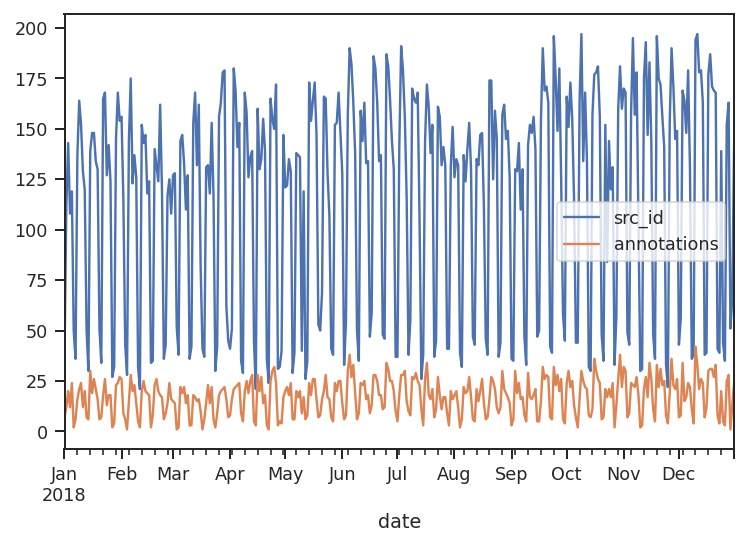

In [73]:
# Plot the number of notes and annotations over time
df_ts.reset_index().groupby('date').count()[['src_id', 'annotations']].plot()

In [74]:
df_ts.reset_index().groupby('date').sum()

,src_id,sentence_id,num_annot,index,id1,id2
date,,,,,,
2018-01-01,7066109,973.0,10,7066109.0,130753368.0,8.439620e+09
2018-01-02,17672629,2092.0,26,17672629.0,433354981.0,2.556138e+10
2018-01-03,22573727,2620.0,50,22573727.0,578773616.0,3.266211e+10
2018-01-04,17069167,2214.0,36,17069167.0,426235497.0,2.468170e+10
2018-01-05,20806063,2617.0,44,20806063.0,479903454.0,2.720923e+10
...,...,...,...,...,...,...
2018-12-27,24587291,2414.0,60,24587291.0,556646145.0,4.131793e+10
2018-12-28,27266033,3076.0,60,27266033.0,661858749.0,4.432070e+10
2018-12-29,7871984,837.0,12,7871984.0,208375474.0,1.387065e+10


<AxesSubplot:xlabel='date'>

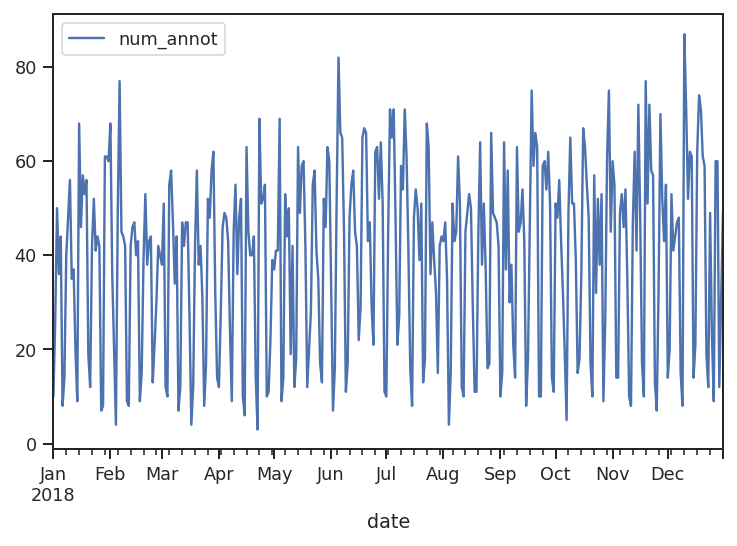

In [77]:
df_ts.reset_index().groupby('date').sum()[['num_annot']].plot()

In [100]:
def indicator(lis):
    """Basic indicator function that returns 1 if any item in a list is greater than 1"""
    lis = np.array(lis)
    lis[lis > 0] = 1
    return sum(lis)

df_annot_compl = df_ts.reset_index().groupby('date').agg({
        'num_annot': ['count', indicator]})

df_annot_compl.columns = df_annot_compl.columns.to_series().str.join('_')
df_annot_compl.reset_index(inplace=True)
df_annot_compl

,date,num_annot_count,num_annot_indicator
0,2018-01-01,37,10
1,2018-01-02,112,23
2,2018-01-03,143,46
3,2018-01-04,108,33
4,2018-01-05,119,39
...,...,...,...
360,2018-12-27,152,58
361,2018-12-28,163,56
362,2018-12-29,51,12
363,2018-12-30,66,21


In [107]:
# Look at how complete the annotation are (relative to all notes)
df_annot_compl['annot_completeness'] = df_annot_compl.num_annot_indicator / df_annot_compl.num_annot_count
df_annot_compl.set_index('date', inplace=True)
df_annot_compl

,num_annot_count,num_annot_indicator,annot_completeness
date,,,
2018-01-01,37,10,0.270270
2018-01-02,112,23,0.205357
2018-01-03,143,46,0.321678
2018-01-04,108,33,0.305556
2018-01-05,119,39,0.327731
...,...,...,...
2018-12-27,152,58,0.381579
2018-12-28,163,56,0.343558
2018-12-29,51,12,0.235294


<AxesSubplot:xlabel='date'>

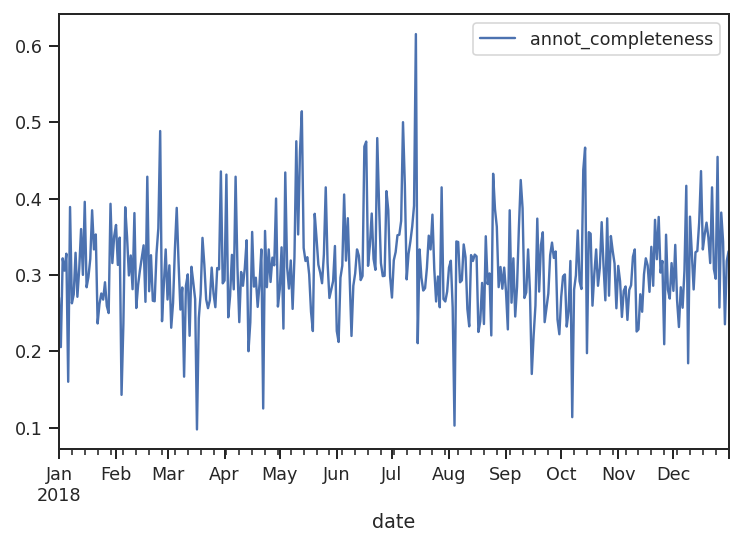

In [108]:
df_annot_compl[['annot_completeness']].plot()

In [118]:
df_ts.id1.nunique(), df_ts.id2.nunique()

(6734, 35191)

In [119]:
df_ts.reset_index().groupby('id1').count().describe()

,date,src_id,annotator,sentence_id,sentence,encoding_shape,num_annot,annotations,index,id2,type,note,other1,other2
count,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000
mean,6.296406,6.296406,6.296406,5.822394,6.296258,6.296406,6.296406,0.940451,6.296406,6.296406,5.481437,6.293733,0.081081,0.006980
std,11.398395,11.398395,11.398395,10.757936,11.398223,11.398395,11.398395,2.504033,11.398395,11.398395,10.543420,11.395467,0.454319,0.106712
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000
max,229.000000,229.000000,229.000000,217.000000,229.000000,229.000000,229.000000,45.000000,229.000000,229.000000,210.000000,229.000000,11.000000,4.000000


In [120]:
df_ts.reset_index().groupby('id2').count().describe()

,date,src_id,annotator,sentence_id,sentence,encoding_shape,num_annot,annotations,index,id1,type,note,other1,other2
count,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000,35191.000000
mean,1.204854,1.204854,1.204854,1.114149,1.204825,1.204854,1.204854,0.179961,1.204854,1.204854,1.048905,1.204342,0.015515,0.001336
std,0.456092,0.456092,0.456092,0.526222,0.456136,0.456092,0.456092,0.416323,0.456092,0.456092,0.586454,0.456446,0.145358,0.041613
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000


In [ ]:
for subject in df_ts.src_id.unique()[:5]:
    data = df_ts[df_ts.src_id == subject][['num_annot', 'annotations']]
    print(data.describe())

In [116]:
_df.annotations.value_counts().head(50)

type\_Background                                              23362
target                                                         4945
disregard\_file                                                 671
info\_Third party                                               382
STM 1 | .B152: Stemming                                         293
.D450: Lopen en zich verplaatsen                                262
.D450: Lopen en zich verplaatsen | FAC 4                        215
view\_Patient                                                   124
FAC 4 | .D450: Lopen en zich verplaatsen                        112
.B152: Stemming | STM 1                                         111
*                                                               105
STM 3 | .B152: Stemming                                          87
STM 1 | stm\_reaction | .B152: Stemming                          84
STM 1 | .B152: Stemming | stm\_reaction                          82
.B455: Inspanningstolerantie                    

In [ ]:
DOMAINS = [
    'STM',  # B152 stemming (mood) 0-4
    'INS',  # B455 Inspanningstolerantie (exercise tolerance) 0-5
    'BER',  # D840-859 Beroep en werk (profession and work) 0-4
    'FAC',  # D450 Lopen en zich verplaatsen (walking and movement) 0-5
]